<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

# I. EDA & Data Preprocessing

### Import libraries

In [1]:
# install plotly
!pip install plotly

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

### Load Data

In [5]:
# Import dataset
walmart_df = pd.read_csv("Data/Walmart_Store_sales.csv")

In [4]:
#target = weekly sales

# the unemployment rate or the fuel price, that might be useful for 
# predicting the amount of sales

#CPI : "Consumer price index" : This index measures the change in prices for the essential goods and services 
#that the least wealthy in our society must consume, such as rent, food and energ

### EDA

#### Basic info & stats of the data

In [6]:
print("Walmart_df :")
display(walmart_df)

display(walmart_df.info())

print("Basics statistics: ")
display(walmart_df.describe(include="all"))

print("Percentage of missing values : ")
display((walmart_df.isnull().sum()/walmart_df.shape[0]*100).sort_values(ascending=False))

Walmart_df :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


Percentage of missing values : 


Date            12.000000
Temperature     12.000000
Unemployment    10.000000
Weekly_Sales     9.333333
Fuel_Price       9.333333
Holiday_Flag     8.000000
CPI              8.000000
Store            0.000000
dtype: float64

#### Preprocessing with Pandas

In [7]:
# Missing values in Weekly_Sales
walmart_df[walmart_df["Weekly_Sales"].isnull()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
19,3.0,18-05-2012,NaN,0.0,72.38,3.630,225.251202,6.664
31,5.0,30-12-2011,NaN,1.0,NaN,3.129,220.117823,6.300
57,4.0,07-01-2011,NaN,0.0,NaN,2.980,127.191774,6.510
69,20.0,26-03-2010,NaN,0.0,50.49,2.854,204.201755,8.187
71,20.0,07-09-2012,NaN,1.0,76.36,3.911,215.218957,NaN
77,3.0,29-07-2011,NaN,0.0,88.07,3.682,NaN,7.567
84,8.0,03-09-2010,NaN,0.0,76.14,2.577,214.894576,6.315
109,1.0,09-12-2011,NaN,NaN,43.93,3.158,218.961846,7.866
117,19.0,13-04-2012,NaN,0.0,44.42,4.187,137.868000,8.150


In [8]:
walmart_df["Weekly_Sales"].isnull().sum()

14

In [9]:
walmart_df[walmart_df["Weekly_Sales"].isnull()].index

Int64Index([2, 19, 31, 57, 69, 71, 77, 84, 109, 117, 126, 133, 134, 140], dtype='int64')

In [10]:
# Drop rows with no values in target column Weekly_Sales
walmart_df = walmart_df.drop(walmart_df[walmart_df["Weekly_Sales"].isnull()].index)
walmart_df.shape

(136, 8)

In [11]:
walmart_df["Weekly_Sales"].isnull().any()

False

In [12]:
walmart_df["Date"].isnull().sum()

18

In [13]:
walmart_df[walmart_df["Date"].isnull()].index

Int64Index([3, 9, 17, 34, 42, 65, 81, 82, 83, 86, 88, 89, 91, 92, 102, 129,
            137, 146],
           dtype='int64')

In [14]:
# Drop rows with Nan in Date column 
walmart_df = walmart_df.drop(walmart_df[walmart_df["Date"].isnull()].index)
walmart_df.shape

(118, 8)

In [15]:
walmart_df[walmart_df["Holiday_Flag"] != 0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
15,6.0,30-04-2010,1498080.16,NaN,68.91,2.780,211.894272,7.092
32,7.0,10-02-2012,563460.77,1.0,18.79,3.103,196.919506,8.256
33,14.0,10-02-2012,2077256.24,1.0,37.00,NaN,NaN,8.424
43,7.0,26-08-2011,629994.47,NaN,57.60,3.485,194.379637,8.622
44,1.0,12-02-2010,1641957.44,1.0,38.51,2.548,211.242170,8.106
48,1.0,05-08-2011,1624383.75,NaN,91.65,3.684,215.544618,7.962
53,14.0,25-03-2011,1879451.23,NaN,41.76,3.625,184.994368,8.549
73,1.0,27-08-2010,1449142.92,NaN,85.22,2.619,211.567306,7.787
90,9.0,09-07-2010,485389.15,NaN,78.51,2.642,214.656430,6.442


In [16]:
walmart_df = walmart_df.drop(walmart_df[walmart_df["Holiday_Flag"].isnull()].index)
walmart_df.shape

(109, 8)

In [17]:
walmart_df = walmart_df.reset_index(drop=True)

In [18]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
1,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
2,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
3,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
4,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
...,...,...,...,...,...,...,...,...
104,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
105,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
106,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
107,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [19]:
#Convert date in datetime object
walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])
display(walmart_df.head())
print("Date column format :", walmart_df["Date"].dtype)
print("Date type :", type(walmart_df["Date"][0]))

/tmp/ipykernel_77/46115005.py:2: UserWarning: Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])
/tmp/ipykernel_77/46115005.py:2: UserWarning: Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])
/tmp/ipykernel_77/46115005.py:2: UserWarning: Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])
/tmp/ipykernel_77/46115005.py:2: UserWarning: Parsing '15-10-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])
/tmp/ipykernel_77/46115005.py:2: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092
2,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896
3,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658
4,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961


Date column format : datetime64[ns]
Date type : <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
print("year :", walmart_df["Date"][4].year)
print("month :", walmart_df["Date"][4].month)
print("Day :", walmart_df["Date"][4].day)
print("Day of Week :", walmart_df["Date"][4].isocalendar()[2])
print("Week of year :", walmart_df["Date"][4].isocalendar()[1])

year : 2012
month : 3
Day : 2
Day of Week : 5
Week of year : 9


In [21]:
# Create 5 new variables of date for new axes of analysis 
walmart_df['year'] = walmart_df['Date'].dt.year
walmart_df['month'] = walmart_df['Date'].dt.month
walmart_df['day'] = walmart_df['Date'].dt.day
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28
2,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28
3,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6
4,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2
...,...,...,...,...,...,...,...,...,...,...,...
104,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19
105,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18
106,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6
107,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8


In [22]:
#Create variables weekday and weekyear
weekday = []
weekyear = []
for i in range (walmart_df.shape[0]):
    weekday.append(walmart_df["Date"][i].isocalendar()[2])
    weekyear.append(walmart_df["Date"][i].isocalendar()[1])
walmart_df["weekday"] = weekday
walmart_df["weekyear"] = weekyear

In [23]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
2,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,5,21
3,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
4,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,5,9


In [24]:
len(walmart_df["Store"].unique())

20

In [25]:
# extract walmart_df in csv file
walmart_df.to_csv('src/walmart_describe.csv',index=False)

In [3]:
# Load walmart_describe.csv

walmart_df = pd.read_csv('src/walmart_describe.csv')
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
2,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,5,21
3,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
4,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,5,42
105,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,5,24
106,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6,6,44
107,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8,4,49


#### Make some visualisation

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

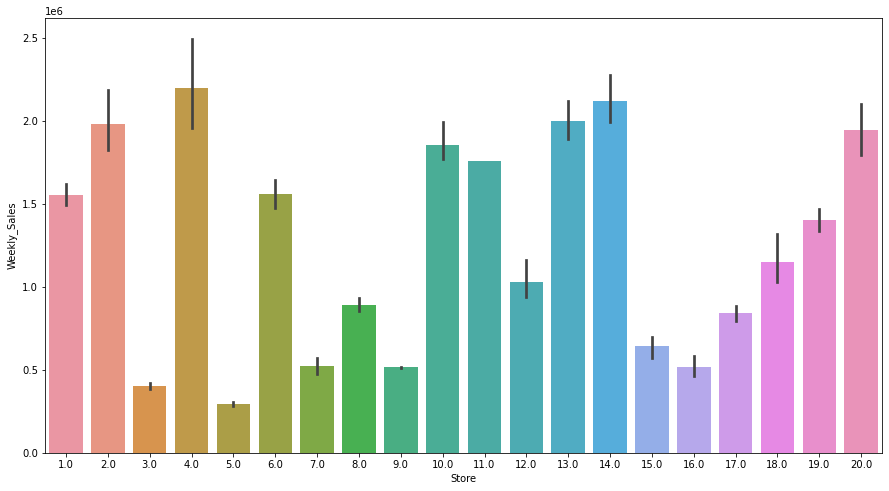

In [27]:
# Weekly Sales by Store
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(x="Store", y="Weekly_Sales", data=walmart_df)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

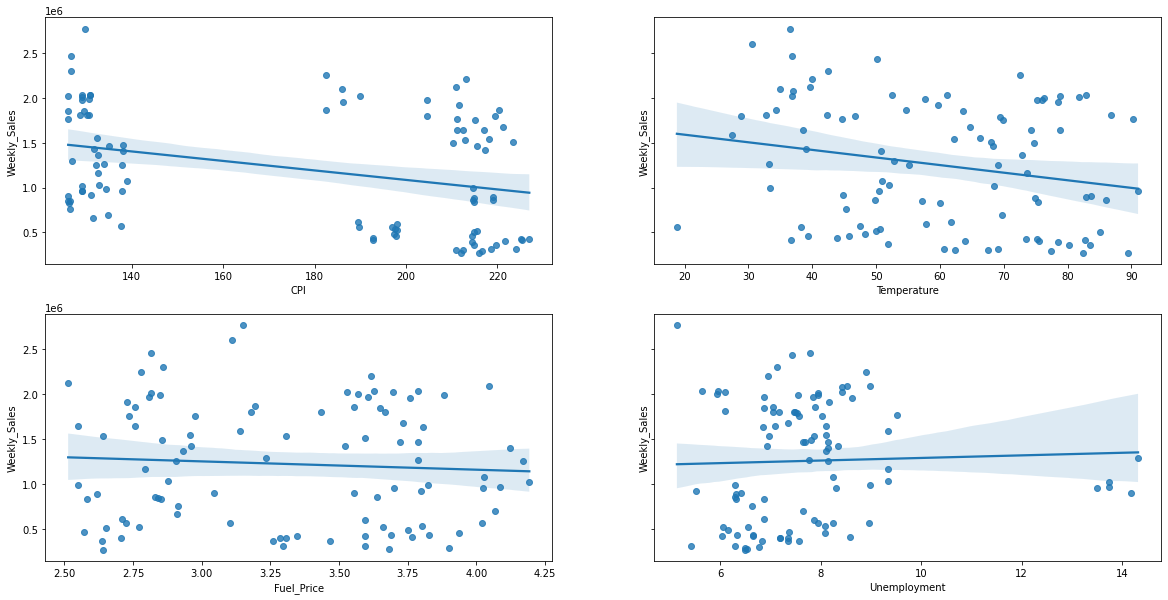

In [29]:
fig, ax = plt.subplots(2,2, figsize=(20,10), sharey=True)
sns.regplot(ax=ax[0,0], x="CPI", y="Weekly_Sales", data = walmart_df)
sns.regplot(ax=ax[0,1], x="Temperature", y="Weekly_Sales", data = walmart_df)
sns.regplot(ax=ax[1,0], x="Fuel_Price", y="Weekly_Sales", data = walmart_df)
sns.regplot(ax=ax[1,1], x="Unemployment", y="Weekly_Sales", data = walmart_df)

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

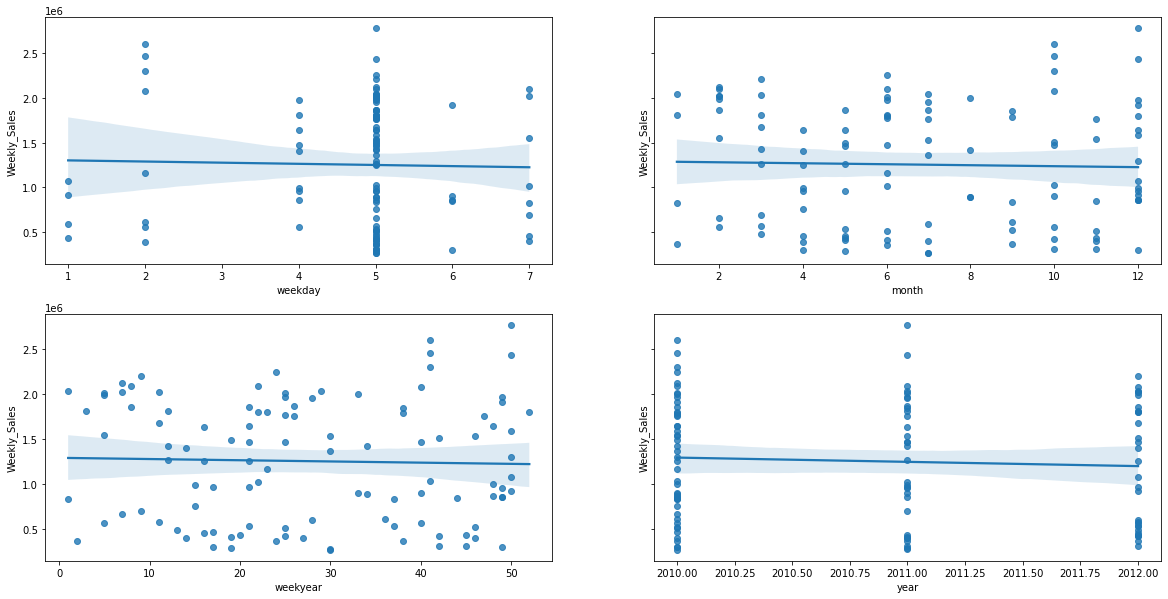

In [37]:
fig, ax = plt.subplots(2,2, figsize=(20,10), sharey=True)
sns.regplot(ax=ax[0,0], x="weekday", y="Weekly_Sales", data = walmart_df)
sns.regplot(ax=ax[0,1], x="month", y="Weekly_Sales", data = walmart_df)
sns.regplot(ax=ax[1,0], x="weekyear", y="Weekly_Sales", data = walmart_df)
sns.regplot(ax=ax[1,1], x="year", y="Weekly_Sales", data = walmart_df)

In [4]:
# Weekly Sales by week of the year
fig = px.histogram(walmart_df,
                  x="weekyear",
                  y="Weekly_Sales",
                  nbins=53)
fig.update_layout(bargap=0.2)
fig.show(renderer="iframe_connected")

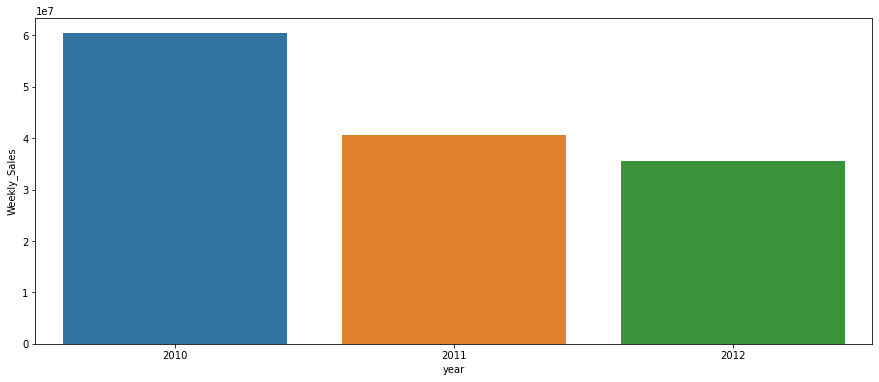

In [5]:
# Weekly Sales by year
sales_years = pd.DataFrame(walmart_df.groupby('year')['Weekly_Sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='year', y='Weekly_Sales', data=sales_years)

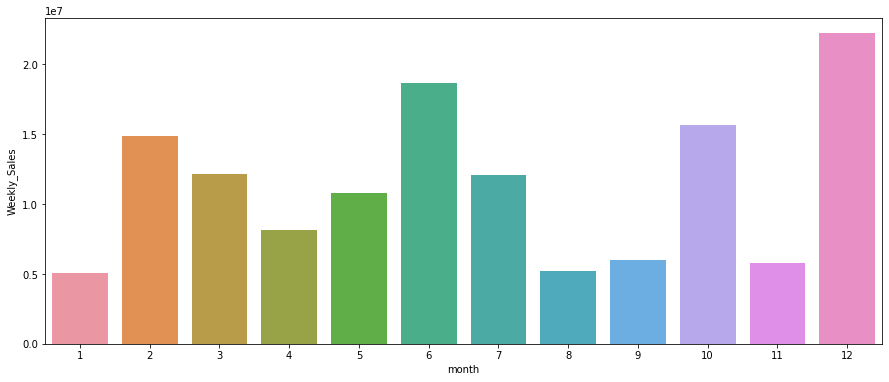

In [34]:
# Weekly Sales by month
sales_years = pd.DataFrame(walmart_df.groupby('month')['Weekly_Sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='month', y='Weekly_Sales', data=sales_years)

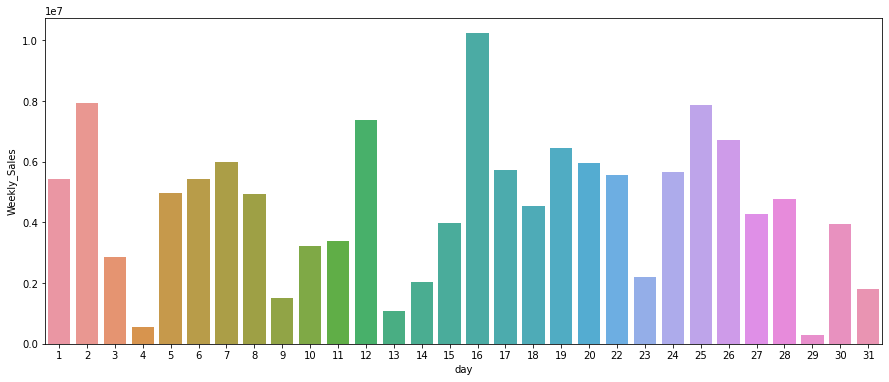

In [ ]:
# Weekly sales by day of month
sales_years = pd.DataFrame(walmart_df.groupby('day')['Weekly_Sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='day', y='Weekly_Sales', data=sales_years)

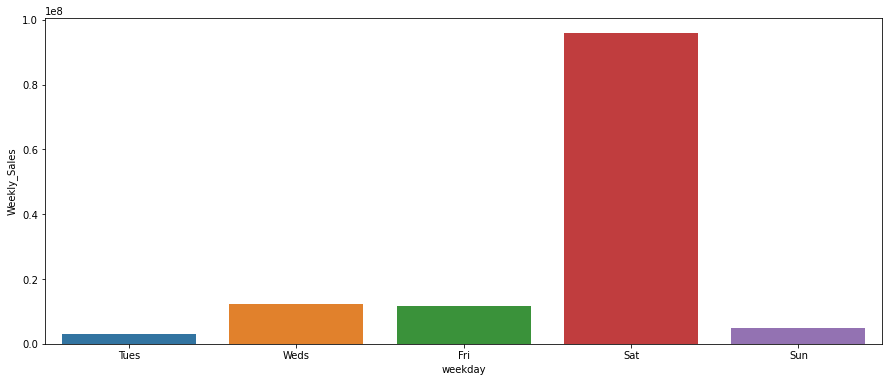

In [36]:
# Weekly Sales by day of the week
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
sales_weekdays = pd.DataFrame(walmart_df.groupby('weekday')['Weekly_Sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=sales_weekdays['weekday'].map(days), y='Weekly_Sales', data=sales_weekdays)

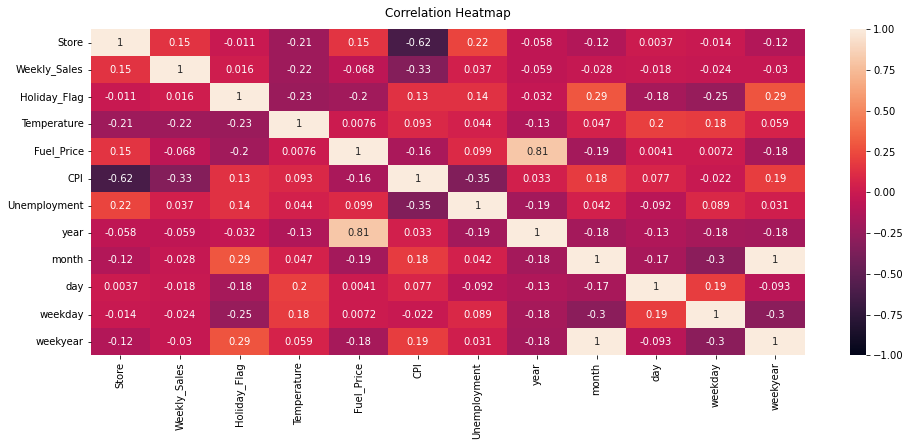

In [38]:
# Correlation matrix

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(walmart_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Drop lines with invalid values or outliers

Drop lines containing invalid values or outliers : In this project, will be considered as outliers all the numeric features that don't fall within the range :  [𝑋¯−3𝜎,𝑋¯+3𝜎]
[
X
¯
−
3
σ
,
X
¯
+
3
σ
]
 . This concerns the columns : Temperature, Fuel_price, CPI and Unemployment

<AxesSubplot:xlabel='Unemployment'>

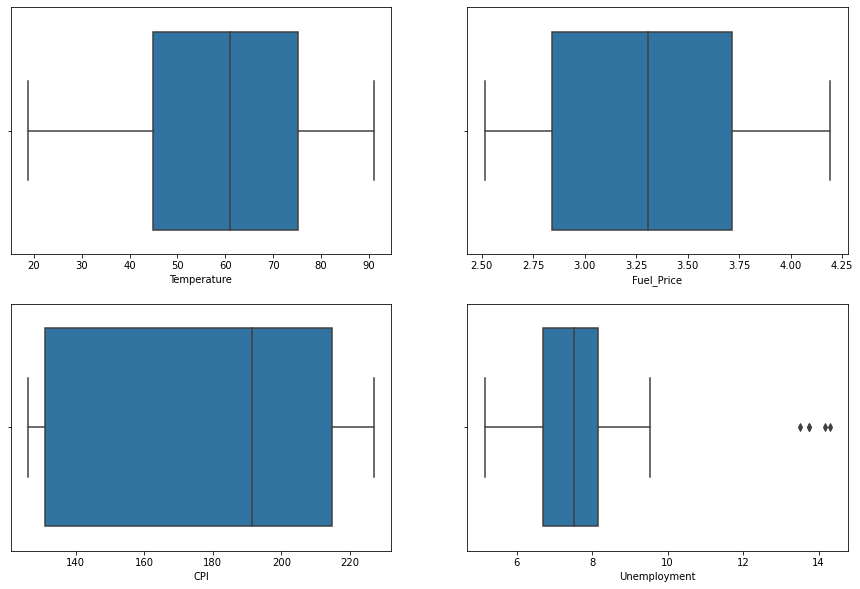

In [27]:
fig, ax = plt.subplots(2,2, figsize=(15,10), sharey=True)
sns.boxplot(ax=ax[0,0], x="Temperature", data=walmart_df)
sns.boxplot(ax=ax[0,1], x="Fuel_Price", data=walmart_df)
sns.boxplot(ax=ax[1,0], x="CPI", data=walmart_df)
sns.boxplot(ax=ax[1,1], x="Unemployment", data=walmart_df)

In [28]:
print('Dropping outliers in Unemployment : ')
to_keep = walmart_df['Unemployment'] < walmart_df['Unemployment'].mean() + 2*walmart_df['Unemployment'].std()
walmart_df = walmart_df.loc[to_keep,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

print('Dropping outliers in CPI : ')
to_keep1 = walmart_df['CPI'] < walmart_df['CPI'].mean() + 2*walmart_df['CPI'].std()
walmart_df = walmart_df.loc[to_keep1,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

print('Dropping outliers in Temperature : ')
to_keep2 = walmart_df['Temperature'] < walmart_df['Temperature'].mean() + 2*walmart_df['Temperature'].std()
walmart_df = walmart_df.loc[to_keep2,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

print('Dropping outliers in Fuel Price : ')
to_keep3 = walmart_df['Fuel_Price'] < walmart_df['Fuel_Price'].mean() + 2*walmart_df['Fuel_Price'].std()
walmart_df = walmart_df.loc[to_keep3,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

Dropping outliers in Unemployment : 
Done. Number of lines remaining :  93

Dropping outliers in CPI : 
Done. Number of lines remaining :  85

Dropping outliers in Temperature : 
Done. Number of lines remaining :  77

Dropping outliers in Fuel Price : 
Done. Number of lines remaining :  71



In [29]:
# check missing values
print("Percentage of missing values : ")
display((walmart_df.isnull().sum()/walmart_df.shape[0])*100)
print()

Percentage of missing values : 


Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
weekday         0.0
weekyear        0.0
dtype: float64

In [31]:
# extract walmart_df in csv file
walmart_df.to_csv('src/walmart_after_prepross.csv',index=False)

In [6]:
# Load walmart_after_prepross.csv

walmart_df = pd.read_csv('src/walmart_after_prepross.csv')
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
2,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
3,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,5,9
4,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011,8,19,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,7.0,2012-05-25,532739.77,0.0,50.60,3.804,197.588605,8.090,2012,5,25,5,21
67,3.0,2010-04-06,396968.80,0.0,78.53,2.705,214.495838,7.343,2010,4,6,2,14
68,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,5,42
69,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,5,24


In [5]:
# Separate target variable Y from features X
print("Separating labels from features...")
todropfromfeatures = ["Date", "Weekly_Sales", "weekyear"]
features_list = [c for c in walmart_df.columns if c not in todropfromfeatures]
target_variable = "Weekly_Sales"

X = walmart_df.loc[:,features_list]
Y = walmart_df.loc[:,target_variable]

print("...Done.")
print()

print('Y .... : ')
print(Y.head())
print()
print("Y shape :", Y.shape)
print()
print('X .... :')
print(X.head())
print()
print("X shape :", X.shape)
print()

Separating labels from features...
...Done.

Y .... : 
0    1807545.43
1    1644470.66
2     695396.19
3    2203523.20
4     895066.50
Name: Weekly_Sales, dtype: float64

Y shape : (71,)

X .... :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0   13.0           0.0        42.38       3.435  128.616064         7.470   
1    6.0           0.0        78.89       2.759  212.412888         7.092   
2   15.0           0.0        69.80       4.069  134.855161         7.658   
3   20.0           0.0        39.93       3.617  213.023622         6.961   
4    8.0           0.0        82.92       3.554  219.070197         6.425   

   year  month  day  weekday  
0  2011      3   25        5  
1  2010      5   28        5  
2  2011      3    6        7  
3  2012      3    2        5  
4  2011      8   19        5  

X shape : (71, 10)



#### Preprocessing with Scikit-Learn

Explanatory variables (X) We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

Categorical variables : Store, Holiday_Flag
Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

In [6]:
# Divide dataset into train set & test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print("Train test split...Done...")
print()

Dividing into train and test sets...
Train test split...Done...



In [7]:
# Create pipeline for numeric features
numeric_features = [2,3,4,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [8]:
# Create pipeline for categorical features
categorical_features = [0, 1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [9]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[:5])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[:5])
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
19    3.0           0.0        80.19       3.467  219.741491         7.567   
20    4.0           0.0        81.85       3.570  129.066300         5.946   
48   13.0           0.0        78.82       2.814  126.139200         7.951   
17    7.0           1.0        18.79       3.103  196.919506         8.256   
34   10.0           0.0        57.62       3.882  130.645793         7.545   

    year  month  day  weekday  
19  2011      9   23        5  
20  2011      6   24        5  
48  2010      2    7        7  
17  2012     10    2        2  
34  2012      2    3        5  
...Done.
  (0, 0)	1.2396473849091425
  (0, 1)	0.2695443519979552
  (0, 2)	1.0963716625048132
  (0, 3)	0.28008551941712795
  (0, 5)	1.0
  (1, 0)	1.3368483877273498
  (1, 1)	0.47995602100921597
  (1, 2)	-1.2333783847157365
  (1, 3)	-1.4905839638762224
  (1, 6)	1.0
  (2, 0)	1.1594272801736338
  (2, 

# II. Baseline model (linear regression)

#### Model training

In [11]:
# Train model 
model = LinearRegression()

In [12]:
print("Training model ...")
model.fit(X_train, Y_train) 
print("... Done.")

Training model ...
... Done.


#### Predictions

In [13]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

Predictions on training set...
...Done.
[ 283400.10606162 2172147.29313005 1904598.73615265  646786.12408327
 1886098.07032786]



In [14]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 531194.86689354 2014835.49931315  435385.48353677  484172.09594147
  492655.10220489]



#### Performance evaluation

In [15]:
# Print scores
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9829993133198969
R2 score on test set :  0.9523607046775158


The model performs much better on the training data than on the test data. It means that the model overfit. 

In [31]:
predictions_df = pd.DataFrame ({"Y_test" : Y_test, "Y_test_pred": Y_test_pred})
predictions_df

,Y_test,Y_test_pred
35,313358.15,5.311949e+05
3,2203523.20,2.014835e+06
21,311906.70,4.353855e+05
38,461622.22,4.841721e+05
2,695396.19,4.926551e+05
6,414094.05,4.099089e+05
32,888816.78,8.894299e+05
39,2461468.35,2.019744e+06
46,1953544.76,1.970589e+06
50,2302504.86,2.260426e+06


In [33]:
# MSE: Mean Squares error
print("MSE score on training set : ", mean_squared_error(Y_train, Y_train_pred))
print("MSE score on test set : ", mean_squared_error(Y_test, Y_test_pred))

MSE score on training set :  7431620010.856902
MSE score on test set :  28003519739.60058


In [29]:
# RMSE = sqrt(MSE)
print("RMSE score on training set : ", sqrt(mean_squared_error(Y_train, Y_train_pred)))
print("RMSE score on test set : ", sqrt(mean_squared_error(Y_test, Y_test_pred)))

RMSE score on training set :  86206.84433881629
RMSE score on test set :  167342.52220998876


In [17]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__Temperature', 'num__Fuel_Price', 'num__CPI',
       'num__Unemployment', 'cat__Store_2.0', 'cat__Store_3.0',
       'cat__Store_4.0', 'cat__Store_5.0', 'cat__Store_6.0',
       'cat__Store_7.0', 'cat__Store_8.0', 'cat__Store_9.0',
       'cat__Store_10.0', 'cat__Store_11.0', 'cat__Store_13.0',
       'cat__Store_14.0', 'cat__Store_15.0', 'cat__Store_16.0',
       'cat__Store_17.0', 'cat__Store_18.0', 'cat__Store_19.0',
       'cat__Store_20.0', 'cat__Holiday_Flag_1.0'], dtype=object)

In [18]:
# Display the coefficients of each of the explanatory variables
model.coef_

array([  -36250.1016848 ,  -109749.08740486,   676930.69691166,
         -89228.12316076,   236021.90768744, -1294904.87598319,
        2039544.15433727, -1325496.2555823 ,    44261.1279932 ,
        -625314.53831605,  -928635.007134  , -1301978.41393076,
        1900391.67598799,   128141.55465515,  1842400.35122376,
        1141861.10436931,   512529.18255092,  -783923.1000319 ,
         608283.57419841,   971311.38481664,  1259321.54367736,
         442480.28183005,   -54052.75988022])

In [19]:
coefs = pd.DataFrame(index=feature_names, data = np.round(model.coef_, 2).transpose(), columns=["coefficients"])
coefs.sort_values("coefficients", ascending=False)

,coefficients
cat__Store_4.0,2039544.15
cat__Store_10.0,1900391.68
cat__Store_13.0,1842400.35
cat__Store_19.0,1259321.54
cat__Store_14.0,1141861.10
cat__Store_18.0,971311.38
num__CPI,676930.70
cat__Store_17.0,608283.57
cat__Store_15.0,512529.18
cat__Store_20.0,442480.28


#### Regularized linear regression : RIDGE

In [35]:
# Perform cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("Cross-validation on Ridge...")
ridgeregressor = Ridge()
scores = cross_val_score(ridgeregressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Cross-validation on Ridge...
The cross-validated R2-score is :  0.6157484459495338
The standard deviation is :  0.060559525140903056


#### GridSearchCV on Ridge

In [36]:
# Perform grid search
print("Grid search...")
ridgeregressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0]
}
gridsearch = GridSearchCV(ridgeregressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.7846190286572211


In [37]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

Predictions on training set...
...Done.
[ 301745.91726177 2174958.53168443 1873424.45065426  612396.3824826
 1882352.10778526]



In [38]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 443532.83938009 1953157.89115732  377439.65124959  521149.2539971
  544108.80372136]



In [39]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9820755181200447
R2 score on test set :  0.9493621999026713


#### Regression Lasso

In [40]:
# Perform cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("Cross-validation on Ridge...")
lassoregressor = Lasso()
scores = cross_val_score(lassoregressor, X_train, Y_train, cv=2)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Cross-validation on Ridge...
The cross-validated R2-score is :  0.6898396960510618
The standard deviation is :  0.016377977740360206


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30794045081.156944, tolerance: 1289896855.8910398
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23672467593.278336, tolerance: 1151700913.3020945
  model = cd_fast.sparse_enet_coordinate_descent(


In [41]:
# Perform grid search
print("Grid search...")
lassoregressor = Lasso()
# Grid of values to be tested
params2 = {'alpha' : [10**(-a) for a in range(10)]}
gridsearch2 = GridSearchCV(lassoregressor, param_grid = params, cv = 10, verbose=1)
gridsearch2.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch2.best_params_)
print("Best R2 score : ", gridsearch2.best_score_)

Grid search...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155559394735.91617, tolerance: 2128563022.640011
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

...Done.
Best hyperparameters :  {'alpha': 1.0}
Best R2 score :  0.8099395896248547


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203978527063.5227, tolerance: 2301578591.9703255
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193528459652.46545, tolerance: 2305979973.356204
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177486090280.3423, tolerance: 2117985833.938884
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: Convergenc

# Conclusion

With GridSearch and cross validation on Ridge, we can see that without regularization, the R2 varies between 0.44 and 0.78, whereas with a regularized model, we achieve a test score greater than 0.9